In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

np.set_printoptions(suppress=True)

## Find chessboard points in all iamges

In [2]:
# Object points in 3D
GRID_SHAPE = (9,6)
objp = np.zeros((GRID_SHAPE[0]*GRID_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_SHAPE[0], 0:GRID_SHAPE[1]].T.reshape(-1,2)
objp *= 20 # One square on my grid has 20mm

processing 003.png


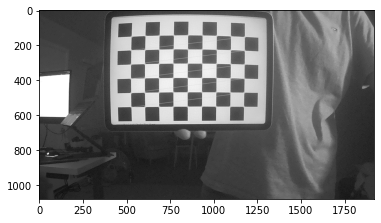

processing 007.png


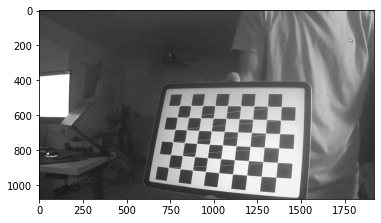

processing 006.png


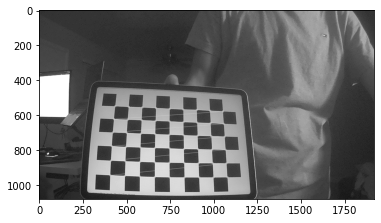

processing 001.png


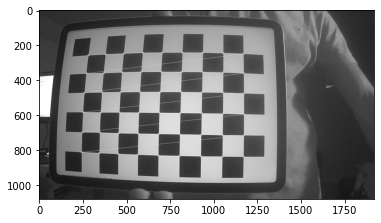

processing 002.png


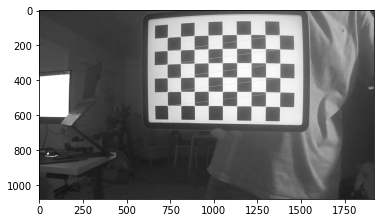

processing 004.png


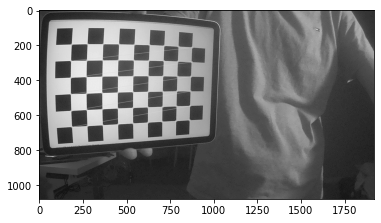

processing 005.png


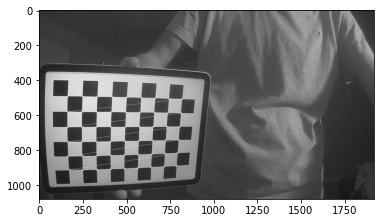

In [3]:
FOLDER = "calib_images/left/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname)
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, GRID_SHAPE, flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

## Get calibration parameters

In [4]:
ret, K_l, dist_coeff_l, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None,None)

In [5]:
K_l # intrinsic param matrix

array([[1561.46158081,    0.        ,  962.68404427],
       [   0.        , 1561.13056405,  659.95663259],
       [   0.        ,    0.        ,    1.        ]])

In [6]:
dist_coeff_l # lens distortion coefficients

array([[-0.37578145,  0.26751151, -0.00028693,  0.00141248, -0.16629889]])

## Undistort an image

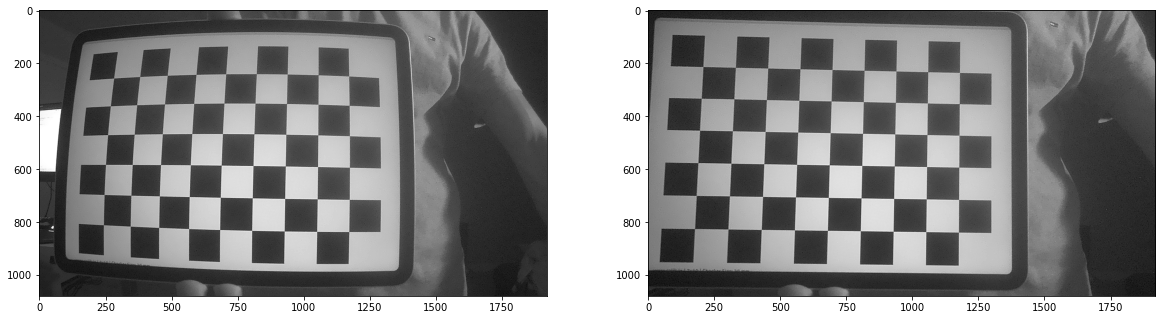

In [7]:
img = Image.open(FOLDER+"001.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_l, dist_coeff_l, None, K_l)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

## Repeat for right image

processing 003.png


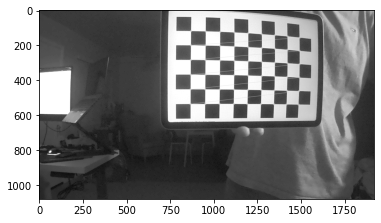

processing 007.png


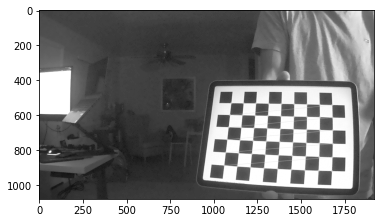

processing 006.png


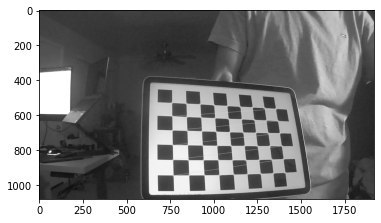

processing 001.png


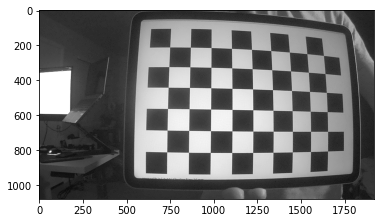

processing 002.png


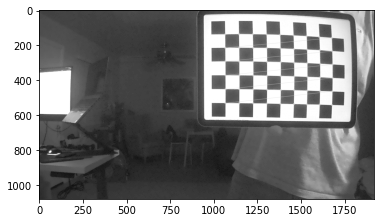

processing 004.png


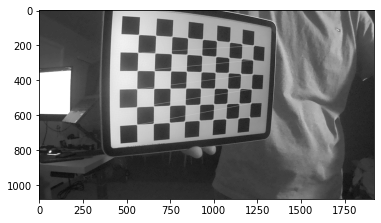

processing 005.png


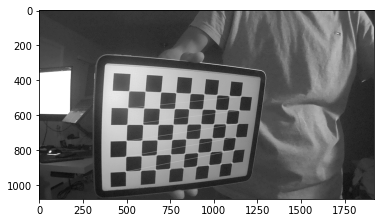

In [8]:
FOLDER = "calib_images/right/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname)
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, (9,6), flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

In [9]:
ret, K_r, dist_coeff_r, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None, None)

In [10]:
K_r

array([[1548.2460185 ,    0.        ,  938.52025246],
       [   0.        , 1546.01995493,  643.97868973],
       [   0.        ,    0.        ,    1.        ]])

In [11]:
K_l

array([[1561.46158081,    0.        ,  962.68404427],
       [   0.        , 1561.13056405,  659.95663259],
       [   0.        ,    0.        ,    1.        ]])

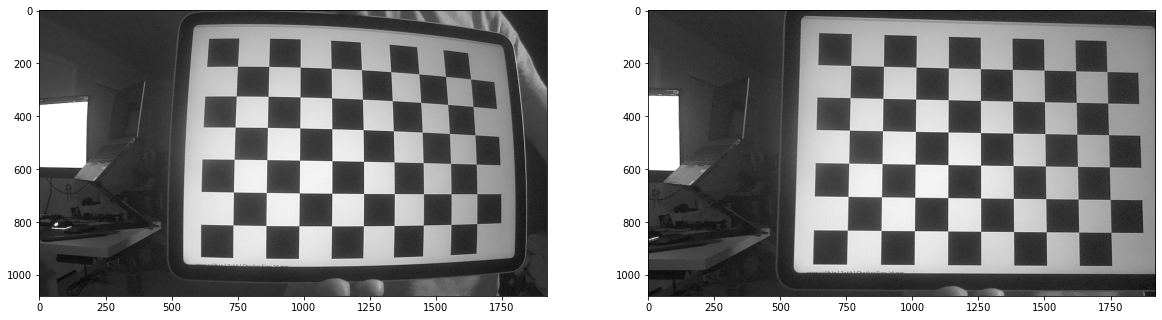

In [12]:
img = Image.open(FOLDER+"001.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_r, dist_coeff_r, None, K_l)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

## Save parameters

In [13]:
np.save("K_l.npy", K_l)
np.save("K_r.npy", K_r)

np.save("dist_coeff_l.npy", dist_coeff_l)
np.save("dist_coeff_r.npy", dist_coeff_r)